In [1]:
import cv2
import numpy as np
import numpy.random as npr
import pandas as pd
import os

import matplotlib.pyplot as plt
import skimage as sk
import skimage.io as skio
%matplotlib inline


In [2]:
#im = np.load(r'/scratch/users/jiaxun1218/saved_models/vgg19/009/epoch-100/50/nearest-1_act.npy')
#im_1 = skio.imread(r'/scratch/users/jiaxun1218/saved_models/vgg19/009/epoch-100/0/nearest-2_high_act_patch_in_original_img.png')
#im_1 = sk.img_as_float(im_1)

In [3]:
#plt.imshow(im)

In [43]:
#fig, axes = plt.subplots(1, 3, figsize=(30, 10))
#for i in range(3):
#    im = skio.imread('/scratch/users/jiaxun1218/saved_models/vgg19/009/epoch-70/78/nearest-'+str(i+1)+'_high_act_patch_in_original_img.png')
#    axes[i].imshow(im)
#plt.imshow(im_1)

In [13]:
## Get all the dirs for different prototypes
root_dirs = [
    "vgg19/004/nearest_images_100/"
]
dirs = []
for i in range(0, len(root_dirs)):
    for j in range(1000):
        #dirs.append(r'/scratch/users/jiaxun1218/saved_models/' + root_dirs[i] + str(j) + '/')
        dirs.append(r'../../saved_models/' + root_dirs[i] + str(j) + '/')

In [14]:
print(len(dirs))
print(dirs[0])

1000
../../saved_models/vgg19/004/nearest_images_100/0/


In [15]:
# Hyperparameters for prototype comparison
k = 3 # how many to compare?

In [16]:
csv_name = "../human_comparisons/comparison_004_heatmap_1.csv"
if os.path.exists(csv_name):
    comp_df = pd.read_csv(csv_name)
    
else:
    comp_df = pd.DataFrame({"left": [], "right": [], "comp": []})

In [17]:
comp_df.head()

Empty DataFrame
Columns: [left, right, comp]
Index: []

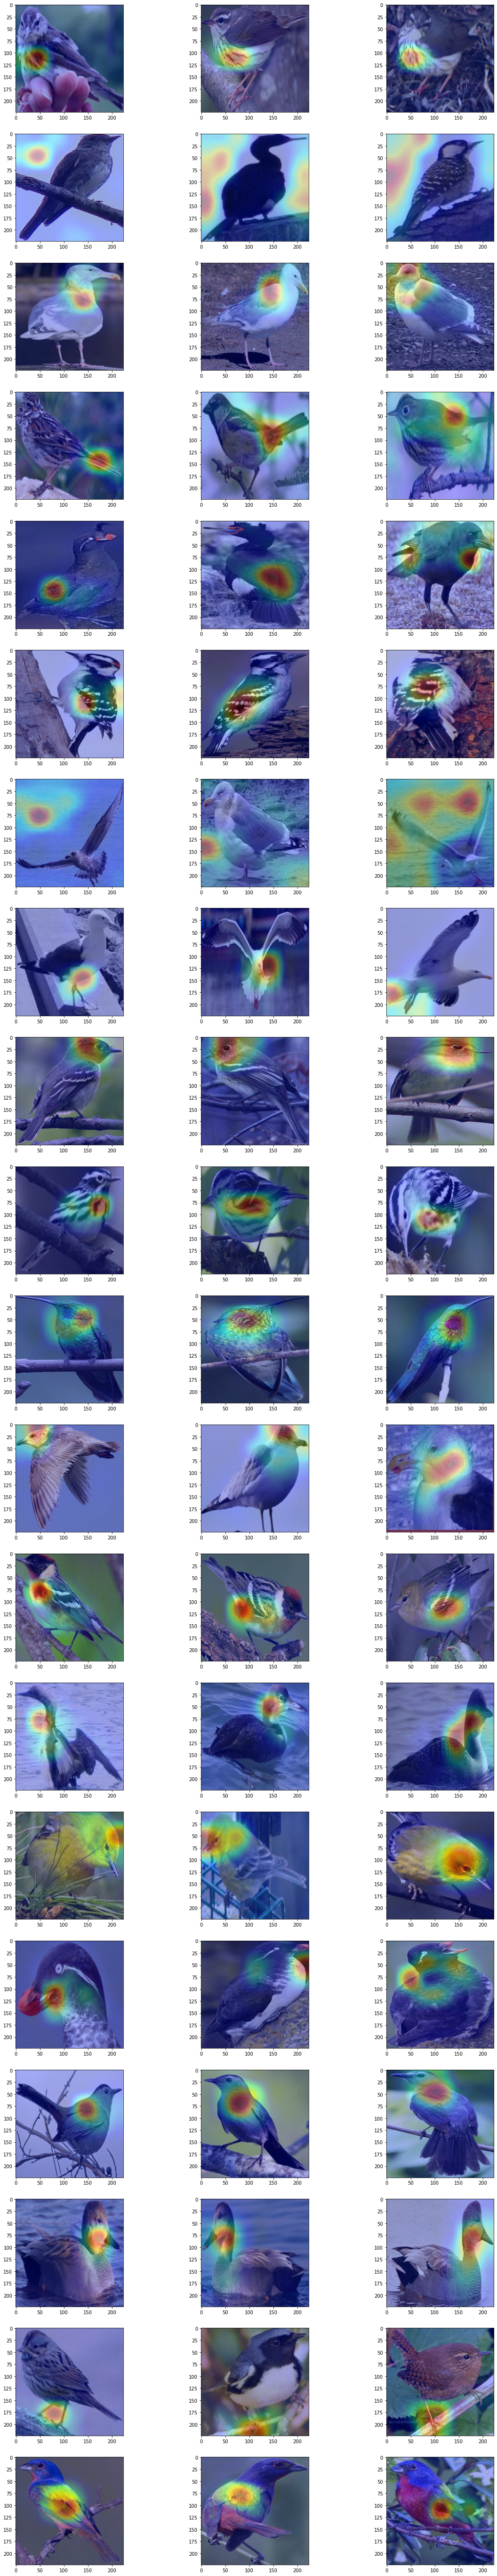

In [18]:
fig, axes = plt.subplots(20, k, figsize=(20, 100))
left_vals = []
right_vals = []
for i in range(10):
    # Get left choice
    left_dir = npr.choice(dirs)
    left_vals.append(left_dir)
    left_names = []
    left_imgs = []
    for j in range(1, k+1):
        nearest_j = left_dir + 'nearest-' + str(j) + '_original_with_heatmap.png'
        left_img = skio.imread(nearest_j)
        left_img = sk.img_as_float(left_img)
        #left_img = np.load(nearest_j)
        left_imgs.append(left_img)

    # Get right choice
    right_dir = npr.choice(dirs)
    right_vals.append(right_dir)
    right_names = []
    right_imgs = []
    for j in range(1, k+1):
        nearest_j = right_dir + 'nearest-' + str(j) + '_original_with_heatmap.png'
        right_names.append(nearest_j)
        right_img = skio.imread(nearest_j)
        right_img = sk.img_as_float(right_img)
        #right_img = np.load(nearest_j)
        right_imgs.append(right_img)
        
    
    #fig, axes = plt.subplots(2, k, figsize=(30,20))
    #for j in range(k):
    #    axes[0][j].imshow(left_imgs[j])
    #    axes[1][j].imshow(right_imgs[j])
    for j in range(k):
        axes[i*2][j].imshow(left_imgs[j])
        axes[i*2+1][j].imshow(right_imgs[j])
    #plt.pause(0.01)
    # query for comparison
    #comp_val = input("Comparison (-1 for Top, 1 for Bottom, 0 for Neither):")


    # append to df
    #comp_df = comp_df.append(pd.DataFrame({"left": [left_dir], "right": [right_dir], "comp": [comp_val]}))


In [27]:
comp_val_inputs = [0, -1, 0, 0, 1, -1, 0, 1, -1, 1, 1, 0, 1, -1, -1, 0, -1, 0, 0, 1]
assert len(comp_val_inputs) == len(left_vals)
assert len(comp_val_inputs) == len(right_vals)
for i in range(len(comp_val_inputs)):
    comp_df = comp_df.append(pd.DataFrame({"left": [left_vals[i]], "right": [right_vals[i]], "comp": [comp_val_inputs[i]]}))

In [28]:
len(comp_df)

40

In [29]:
comp_df.to_csv(csv_name)
print(comp_df)

    Unnamed: 0                                               left  \
0          0.0  /scratch/users/jiaxun1218/saved_models/vgg19/0...   
1          0.0  /scratch/users/jiaxun1218/saved_models/vgg19/0...   
2          0.0  /scratch/users/jiaxun1218/saved_models/vgg19/0...   
3          0.0  /scratch/users/jiaxun1218/saved_models/vgg19/0...   
4          0.0  /scratch/users/jiaxun1218/saved_models/vgg19/0...   
5          0.0  /scratch/users/jiaxun1218/saved_models/vgg19/0...   
6          0.0  /scratch/users/jiaxun1218/saved_models/vgg19/0...   
7          0.0  /scratch/users/jiaxun1218/saved_models/vgg19/0...   
8          0.0  /scratch/users/jiaxun1218/saved_models/vgg19/0...   
9          0.0  /scratch/users/jiaxun1218/saved_models/vgg19/0...   
10         0.0  /scratch/users/jiaxun1218/saved_models/vgg19/0...   
11         0.0  /scratch/users/jiaxun1218/saved_models/vgg19/0...   
12         0.0  /scratch/users/jiaxun1218/saved_models/vgg19/0...   
13         0.0  /scratch/users/jia

In [12]:
# Get the Comparisons
#for _ in range(0, 100):
#    images = []
#    
#    
    # Get left choice
#    left_choice = npr.choice(dirs)
#    lproto_dirs = os.listdir(left_choice)
#    lproto_choice = npr.choice(lproto_dirs).decode()
    
#    if not os.path.isdir(left_choice + lproto_choice):
#        continue
    
#    left_name = left_choice + lproto_choice
#    lsub_imgs = []
#    for j in range(1, k + 1):
#        img = left_choice + lproto_choice + "/nearest-" + str(j) + "_high_act_patch_in_original_img.png"
#    
#        img = cv2.imread(img)
#        lsub_imgs.append(img)
#    images.append(lsub_imgs)
#    
#    # Get right choice
#    right_choice = npr.choice(dirs)
#    rproto_dirs = os.listdir(right_choice)
#    rproto_choice = npr.choice(rproto_dirs).decode()
#    
#    if not os.path.isdir(right_choice + rproto_choice):
#        continue
    
#    right_name = right_choice + rproto_choice
#    rsub_imgs = []
#    for j in range(1, k + 1):
#        img = right_choice + rproto_choice + "/nearest-" + str(j) + "_high_act_patch_in_original_img.png"
#    
#        img = cv2.imread(img)
#        rsub_imgs.append(img)
#    images.append(rsub_imgs)
    
    
#    f, axarr = plt.subplots(len(images), len(images[0]), figsize=(20,20)) 
#    for i in range(len(images)):
#        for j in range(len(images[0])):

#            axarr[i, j].imshow(images[i][j])
#            axarr[i, j].axis('off')
            
#    plt.figure(figsize=(30, 30), dpi=800)
            
#    plt.show()
    # query for comparison
#    comp_val = input("Comparison (-1 for Top, 1 for Bottom, 0 for Neither):")
    
    
    # append to df
#    comp_df = comp_df.append(pd.DataFrame({"left": [left_name], "right": [right_name], "comp": [comp_val]}))
    

In [42]:
comp_df.shape

(0, 3)

In [ ]:
save = False

In [41]:
if save:
    comp_df.to_csv(csv_name, index = False)

NameError: name 'save' is not defined